In [41]:
!pip install pandas --upgrade --quiet

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\mzaki\\anaconda3\\Lib\\site-packages\\pandas.libs\\msvcp140-ef6047a69b174ada5cb2eff1d2bc9a62.dll'
Consider using the `--user` option or check the permissions.



In [42]:
import pandas as pd
import re


In [43]:
npm_error=pd.read_csv('npm_Questions_withStackTraceClassification.csv',encoding_errors='replace')

In [45]:
npm_error

,Unnamed: 0,QId,QPostTypeId,QAcceptedAnswerId,QOwnerUserId,QAnswerCount,QCommentCount,QFavoriteCount,QCommunityOwnedDate,QCreationDate,QScore,QViewCount,QTitle,QBody,QTags,QStackTrace
0,0,3718968,1,3740347,131227,2.0,1.0,0.0,0.0,2010-09-15T15:06:41.513,11.0,6614.0,How do you set up npm (node package manager) w...,<p>Setting npm up as the root user is straighf...,<javascript><node.js><npm>,0.0
1,1,3758755,1,0,75613,2.0,0.0,0.0,0.0,2010-09-21T09:04:13.160,3.0,1057.0,Including other libraries / files / plugins wi...,<p>I'm using OSX 10.5 and playing around with ...,<javascript><macos><node.js><npm>,0.0
2,2,3789067,1,14086999,425462,2.0,1.0,0.0,0.0,2010-09-24T16:27:15.337,1.0,857.0,npm install issues on Ubuntu 9.04,<p>I’m trying to install npm using the command...,<node.js><npm>,1.0
3,3,3818729,1,3822906,371751,1.0,0.0,0.0,0.0,2010-09-29T04:28:43.400,0.0,1471.0,How do I use Node.js modules?,<p>I recently installed <em>Node.js</em> on a ...,<javascript><node.js><module><npm><linode>,1.0
4,4,4870052,1,4870499,259900,2.0,0.0,0.0,0.0,2011-02-02T01:53:51.633,3.0,2216.0,Configuring a Node JS App to Use NPM,<p>I have a really simple Node JS app and I'd ...,<node.js><npm>,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53930,53183,77589453,1,0,9105207,0.0,0.0,0.0,0.0,2023-12-02T07:13:09.263,0.0,11.0,"Why PNPM marks my package with ""version: link:""?","<p>I have a package, which is published in NPM...",<node.js><typescript><npm><pnpm>,0.0
53931,53184,77590552,1,0,11430151,0.0,0.0,0.0,0.0,2023-12-02T13:31:17.083,0.0,19.0,npm build for Laravel Vite on cPanel Shared Ho...,<p>I'm encountering issues deploying my Larave...,<php><laravel><npm><vite><cpanel>,0.0
53932,53185,77591843,1,0,10249578,0.0,1.0,0.0,0.0,2023-12-02T19:13:48.470,-1.0,17.0,how can i solved this problem ([vite] Internal...,<p>I have a problem every time I use Vite with...,<javascript><reactjs><node.js><npm><vite>,0.0
53933,53186,77592680,1,0,1490156,1.0,6.0,0.0,0.0,2023-12-03T00:30:46.500,0.0,29.0,How can the files in the NPM and GitHub reposi...,<p>It appears that the GitHub repo and the NPM...,<node.js><github><npm><devops><cicd>,0.0


In [46]:
npm_error.head(5)

,Unnamed: 0,QId,QPostTypeId,QAcceptedAnswerId,QOwnerUserId,QAnswerCount,QCommentCount,QFavoriteCount,QCommunityOwnedDate,QCreationDate,QScore,QViewCount,QTitle,QBody,QTags,QStackTrace
0,0,3718968,1,3740347,131227,2.0,1.0,0.0,0.0,2010-09-15T15:06:41.513,11.0,6614.0,How do you set up npm (node package manager) w...,<p>Setting npm up as the root user is straighf...,<javascript><node.js><npm>,0.0
1,1,3758755,1,0,75613,2.0,0.0,0.0,0.0,2010-09-21T09:04:13.160,3.0,1057.0,Including other libraries / files / plugins wi...,<p>I'm using OSX 10.5 and playing around with ...,<javascript><macos><node.js><npm>,0.0
2,2,3789067,1,14086999,425462,2.0,1.0,0.0,0.0,2010-09-24T16:27:15.337,1.0,857.0,npm install issues on Ubuntu 9.04,<p>I’m trying to install npm using the command...,<node.js><npm>,1.0
3,3,3818729,1,3822906,371751,1.0,0.0,0.0,0.0,2010-09-29T04:28:43.400,0.0,1471.0,How do I use Node.js modules?,<p>I recently installed <em>Node.js</em> on a ...,<javascript><node.js><module><npm><linode>,1.0
4,4,4870052,1,4870499,259900,2.0,0.0,0.0,0.0,2011-02-02T01:53:51.633,3.0,2216.0,Configuring a Node JS App to Use NPM,<p>I have a really simple Node JS app and I'd ...,<node.js><npm>,0.0


In [47]:
npm_error.describe()

,QAnswerCount,QCommentCount,QFavoriteCount,QCommunityOwnedDate,QScore,QViewCount,QStackTrace
count,53162.000000,53162.000000,53162.0,53162.0,53162.000000,5.316200e+04,53158.000000
mean,1.349629,1.652553,0.0,0.0,4.825684,5.797085e+03,0.073780
std,2.167635,2.295684,0.0,0.0,49.572752,4.205592e+04,0.261415
min,0.000000,0.000000,0.0,0.0,-7.000000,5.000000e+00,0.000000
25%,1.000000,0.000000,0.0,0.0,0.000000,1.850000e+02,0.000000
50%,1.000000,1.000000,0.0,0.0,1.000000,6.240000e+02,0.000000
75%,2.000000,2.000000,0.0,0.0,2.000000,2.041000e+03,0.000000
max,65.000000,24.000000,0.0,0.0,5236.000000,2.721706e+06,1.000000


In [48]:
!pip install jovian --quiet

In [49]:
import jovian

In [50]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "m-zakirhossen99/thesis1" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/m-zakirhossen99/thesis1


'https://jovian.com/m-zakirhossen99/thesis1'

In [51]:
!pip install plotly matplotlib seaborn --quiet

In [52]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt

In [53]:
import seaborn as sns
%matplotlib inline

In [54]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [55]:
npm_error.QStackTrace.count()

53158

In [56]:
npm_error.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53935 entries, 0 to 53934
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           53862 non-null  object 
 1   QId                  53214 non-null  object 
 2   QPostTypeId          53179 non-null  object 
 3   QAcceptedAnswerId    53173 non-null  object 
 4   QOwnerUserId         53167 non-null  object 
 5   QAnswerCount         53162 non-null  float64
 6   QCommentCount        53162 non-null  float64
 7   QFavoriteCount       53162 non-null  float64
 8   QCommunityOwnedDate  53162 non-null  float64
 9   QCreationDate        53162 non-null  object 
 10  QScore               53162 non-null  float64
 11  QViewCount           53162 non-null  float64
 12  QTitle               53162 non-null  object 
 13  QBody                53162 non-null  object 
 14  QTags                53158 non-null  object 
 15  QStackTrace          53158 non-null 

<Axes: xlabel='QStackTrace', ylabel='QViewCount'>

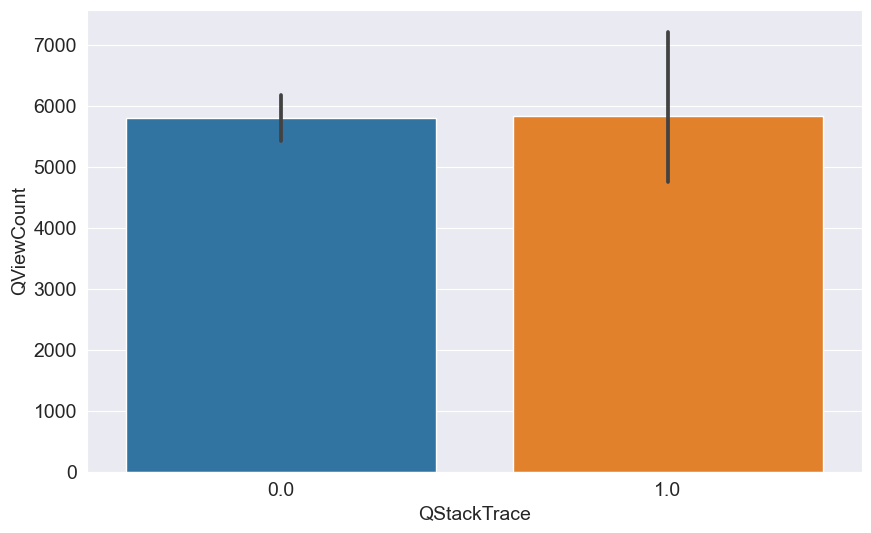

In [57]:
sns.barplot(data=npm_error,x='QStackTrace',y='QViewCount')

<Axes: xlabel='QStackTrace', ylabel='QScore'>

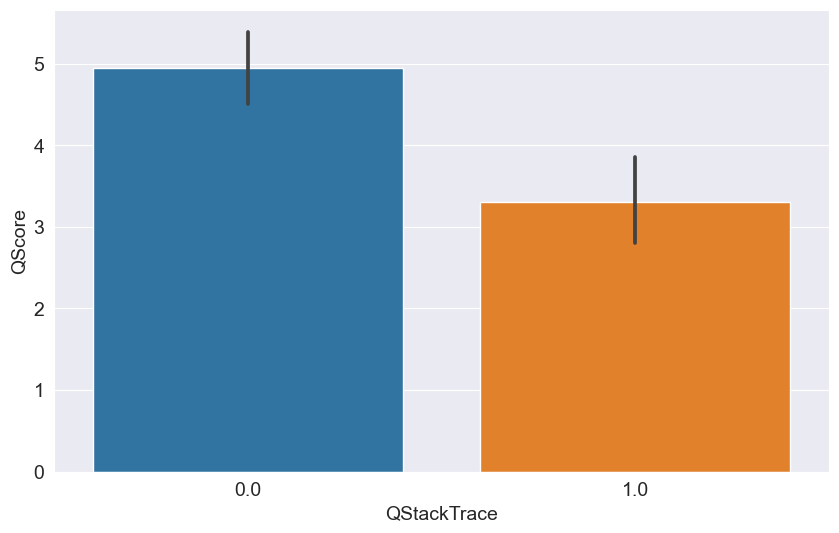

In [58]:
sns.barplot(data=npm_error,x='QStackTrace',y='QScore')

<Axes: xlabel='QStackTrace', ylabel='QAnswerCount'>

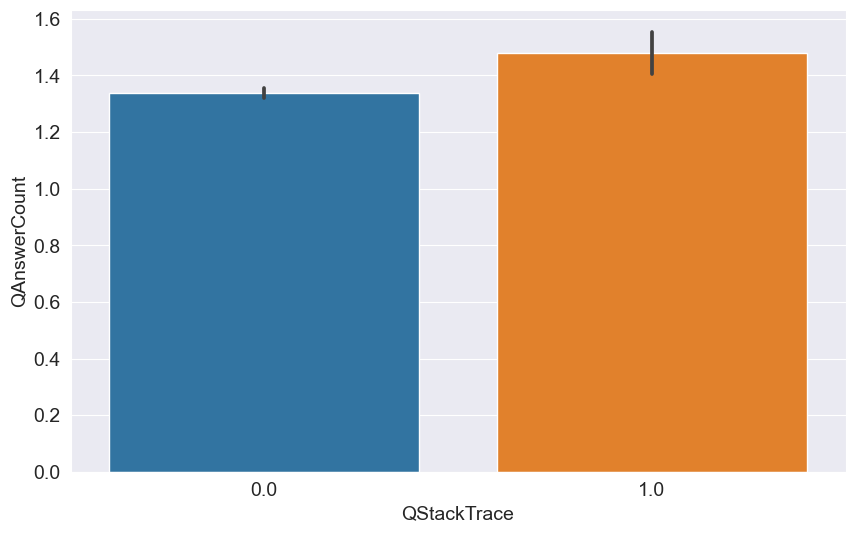

In [59]:
sns.barplot(data=npm_error,x='QStackTrace',y='QAnswerCount')

In [60]:
npm_error.QFavoriteCount.count()

53162

In [61]:
#sns.barplot(data=npm_error,x='QStackTrace',y='QFavoriteCount')

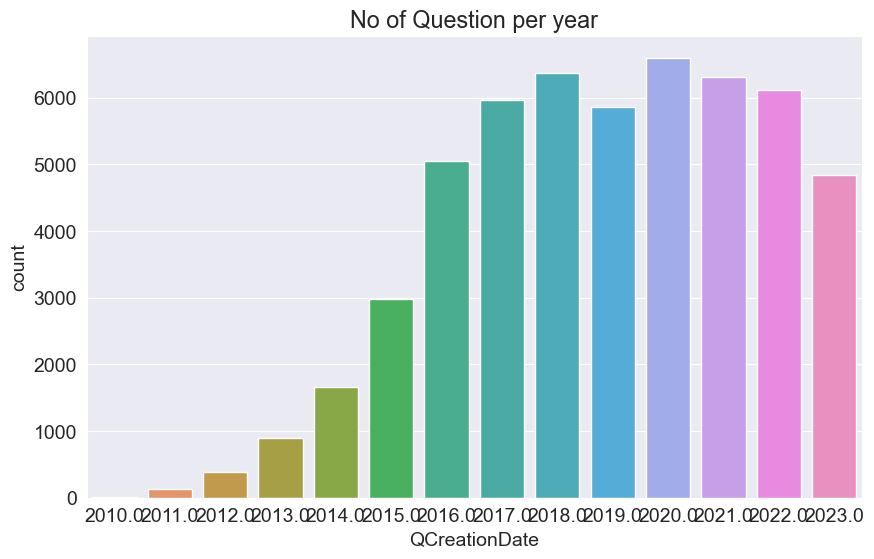

In [62]:
plt.title('No of Question per year')
sns.countplot(x=pd.to_datetime(npm_error.QCreationDate).dt.year);

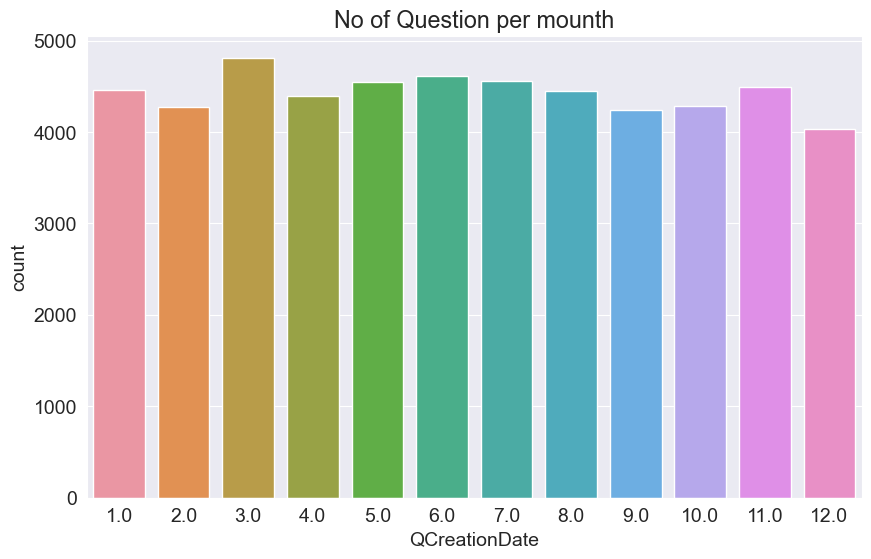

In [63]:
plt.title('No of Question per mounth')
sns.countplot(x=pd.to_datetime(npm_error.QCreationDate).dt.month);

In [64]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "m-zakirhossen99/thesis1" on https://jovian.com/
[jovian] Committed successfully! https://jovian.com/m-zakirhossen99/thesis1


'https://jovian.com/m-zakirhossen99/thesis1'

In [65]:
npm_error.QTags.count()

53158

#### var date2= date2.toString().split("/"); That can be help me to separate every tag.

In [66]:
npm_error.QTags.head(100)


0                           <javascript><node.js><npm>
1                    <javascript><macos><node.js><npm>
2                                       <node.js><npm>
3           <javascript><node.js><module><npm><linode>
4                                       <node.js><npm>
                            ...                       
95                          <javascript><node.js><npm>
96         <javascript><data-structures><node.js><npm>
97    <javascript><node.js><npm><package><npm-install>
98                                      <node.js><npm>
99                             <node.js><express><npm>
Name: QTags, Length: 100, dtype: object

In [67]:
npm_error.columns

Index(['Unnamed: 0', 'QId', 'QPostTypeId', 'QAcceptedAnswerId', 'QOwnerUserId',
       'QAnswerCount', 'QCommentCount', 'QFavoriteCount',
       'QCommunityOwnedDate', 'QCreationDate', 'QScore', 'QViewCount',
       'QTitle', 'QBody', 'QTags', 'QStackTrace'],
      dtype='object')

In [68]:
necesary_column=['QAnswerCount','QCommentCount','QFavoriteCount','QScore','QViewCount','QStackTrace','QTags']
npm_error_final=npm_error[necesary_column]

In [69]:
npm_error_final

,QAnswerCount,QCommentCount,QFavoriteCount,QScore,QViewCount,QStackTrace,QTags
0,2.0,1.0,0.0,11.0,6614.0,0.0,<javascript><node.js><npm>
1,2.0,0.0,0.0,3.0,1057.0,0.0,<javascript><macos><node.js><npm>
2,2.0,1.0,0.0,1.0,857.0,1.0,<node.js><npm>
3,1.0,0.0,0.0,0.0,1471.0,1.0,<javascript><node.js><module><npm><linode>
4,2.0,0.0,0.0,3.0,2216.0,0.0,<node.js><npm>
...,...,...,...,...,...,...,...
53930,0.0,0.0,0.0,0.0,11.0,0.0,<node.js><typescript><npm><pnpm>
53931,0.0,0.0,0.0,0.0,19.0,0.0,<php><laravel><npm><vite><cpanel>
53932,0.0,1.0,0.0,-1.0,17.0,0.0,<javascript><reactjs><node.js><npm><vite>
53933,1.0,6.0,0.0,0.0,29.0,0.0,<node.js><github><npm><devops><cicd>


In [70]:
npm_error

,Unnamed: 0,QId,QPostTypeId,QAcceptedAnswerId,QOwnerUserId,QAnswerCount,QCommentCount,QFavoriteCount,QCommunityOwnedDate,QCreationDate,QScore,QViewCount,QTitle,QBody,QTags,QStackTrace
0,0,3718968,1,3740347,131227,2.0,1.0,0.0,0.0,2010-09-15T15:06:41.513,11.0,6614.0,How do you set up npm (node package manager) w...,<p>Setting npm up as the root user is straighf...,<javascript><node.js><npm>,0.0
1,1,3758755,1,0,75613,2.0,0.0,0.0,0.0,2010-09-21T09:04:13.160,3.0,1057.0,Including other libraries / files / plugins wi...,<p>I'm using OSX 10.5 and playing around with ...,<javascript><macos><node.js><npm>,0.0
2,2,3789067,1,14086999,425462,2.0,1.0,0.0,0.0,2010-09-24T16:27:15.337,1.0,857.0,npm install issues on Ubuntu 9.04,<p>I’m trying to install npm using the command...,<node.js><npm>,1.0
3,3,3818729,1,3822906,371751,1.0,0.0,0.0,0.0,2010-09-29T04:28:43.400,0.0,1471.0,How do I use Node.js modules?,<p>I recently installed <em>Node.js</em> on a ...,<javascript><node.js><module><npm><linode>,1.0
4,4,4870052,1,4870499,259900,2.0,0.0,0.0,0.0,2011-02-02T01:53:51.633,3.0,2216.0,Configuring a Node JS App to Use NPM,<p>I have a really simple Node JS app and I'd ...,<node.js><npm>,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53930,53183,77589453,1,0,9105207,0.0,0.0,0.0,0.0,2023-12-02T07:13:09.263,0.0,11.0,"Why PNPM marks my package with ""version: link:""?","<p>I have a package, which is published in NPM...",<node.js><typescript><npm><pnpm>,0.0
53931,53184,77590552,1,0,11430151,0.0,0.0,0.0,0.0,2023-12-02T13:31:17.083,0.0,19.0,npm build for Laravel Vite on cPanel Shared Ho...,<p>I'm encountering issues deploying my Larave...,<php><laravel><npm><vite><cpanel>,0.0
53932,53185,77591843,1,0,10249578,0.0,1.0,0.0,0.0,2023-12-02T19:13:48.470,-1.0,17.0,how can i solved this problem ([vite] Internal...,<p>I have a problem every time I use Vite with...,<javascript><reactjs><node.js><npm><vite>,0.0
53933,53186,77592680,1,0,1490156,1.0,6.0,0.0,0.0,2023-12-03T00:30:46.500,0.0,29.0,How can the files in the NPM and GitHub reposi...,<p>It appears that the GitHub repo and the NPM...,<node.js><github><npm><devops><cicd>,0.0


# Filtering the specific tags 

In [71]:
def tag_filter(pref_tags: list, tags: str) -> bool:
    regex = ""
    for tag in pref_tags:
        regex += '(?=.*\\b'+ tag +'([+-]?([0-9]*[.])?[0-9]*)\\b)'
    regex = r"^" + regex + ".*$"
    tags = str(tags).strip().lower()
    match_result = re.match(regex, tags, re.MULTILINE | re.IGNORECASE)
    if match_result is None:
        return 0
    else:
        return 1

In [113]:
# tags=["Axios","npm"]
# npm_error['Axios']=npm_error['QTags'].apply(lambda row_tags: tag_filter(tags,row_tags))

In [114]:
npm_error

,Unnamed: 0,QId,QPostTypeId,QAcceptedAnswerId,QOwnerUserId,QAnswerCount,QCommentCount,QFavoriteCount,QCommunityOwnedDate,QCreationDate,...,QStackTrace,Webpack,React,Express,Vue,Jest,Moment,Lodash,Asynchronous,Axios
0,0,3718968,1,3740347,131227,2.0,1.0,0.0,0.0,2010-09-15T15:06:41.513,...,0.0,0,0,0,0,0,0,0,0,0
1,1,3758755,1,0,75613,2.0,0.0,0.0,0.0,2010-09-21T09:04:13.160,...,0.0,0,0,0,0,0,0,0,0,0
2,2,3789067,1,14086999,425462,2.0,1.0,0.0,0.0,2010-09-24T16:27:15.337,...,1.0,0,0,0,0,0,0,0,0,0
3,3,3818729,1,3822906,371751,1.0,0.0,0.0,0.0,2010-09-29T04:28:43.400,...,1.0,0,0,0,0,0,0,0,0,0
4,4,4870052,1,4870499,259900,2.0,0.0,0.0,0.0,2011-02-02T01:53:51.633,...,0.0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53930,53183,77589453,1,0,9105207,0.0,0.0,0.0,0.0,2023-12-02T07:13:09.263,...,0.0,0,0,0,0,0,0,0,0,0
53931,53184,77590552,1,0,11430151,0.0,0.0,0.0,0.0,2023-12-02T13:31:17.083,...,0.0,0,0,0,0,0,0,0,0,0
53932,53185,77591843,1,0,10249578,0.0,1.0,0.0,0.0,2023-12-02T19:13:48.470,...,0.0,0,0,0,0,0,0,0,0,0
53933,53186,77592680,1,0,1490156,1.0,6.0,0.0,0.0,2023-12-03T00:30:46.500,...,0.0,0,0,0,0,0,0,0,0,0


In [115]:
# webpac=npm_error[npm_error['Axios']==True]

In [116]:

# dfe=webpac.to_csv('Axios.csv',index=True)

In [31]:
tags=["webpack","npm"]
npm_error['Webpack']=npm_error['QTags'].apply(lambda row_tags: tag_filter(tags,row_tags))
tags=["React","npm"]
npm_error['React']=npm_error['QTags'].apply(lambda row_tags: tag_filter(tags,row_tags))
tags=["Express","npm"]
npm_error['Express']=npm_error['QTags'].apply(lambda row_tags: tag_filter(tags,row_tags))
tags=["Vue","npm"]
npm_error['Vue']=npm_error['QTags'].apply(lambda row_tags: tag_filter(tags,row_tags))
tags=["Jest","npm"]
npm_error['Jest']=npm_error['QTags'].apply(lambda row_tags: tag_filter(tags,row_tags))
tags=["Moment","npm"]
npm_error['Moment']=npm_error['QTags'].apply(lambda row_tags: tag_filter(tags,row_tags))
tags=["Lodash","npm"]
npm_error['Lodash']=npm_error['QTags'].apply(lambda row_tags: tag_filter(tags,row_tags))
tags=["Asynchronous","npm"]
npm_error['Asynchronous']=npm_error['QTags'].apply(lambda row_tags: tag_filter(tags,row_tags))
tags=["Axios","npm"]
npm_error['Axios']=npm_error['QTags'].apply(lambda row_tags: tag_filter(tags,row_tags))

In [32]:
npm_error.sample(15)

,Unnamed: 0,QId,QPostTypeId,QAcceptedAnswerId,QOwnerUserId,QAnswerCount,QCommentCount,QFavoriteCount,QCommunityOwnedDate,QCreationDate,...,QStackTrace,Webpack,React,Express,Vue,Jest,Moment,Lodash,Asynchronous,Axios
40708,39961,68830777,1,0,16695819,2.0,0.0,0.0,0.0,2021-08-18T10:36:34.313,...,0.0,1,0,0,0,0,0,0,0,0
48903,48156,74873614,1,0,9209091,2.0,0.0,0.0,0.0,2022-12-21T09:07:00.353,...,0.0,0,0,0,0,0,0,0,0,0
52379,51632,76755825,1,0,18664108,0.0,0.0,0.0,0.0,2023-07-24T15:11:52.177,...,0.0,0,0,0,0,0,0,0,0,0
13527,13527,44392802,1,0,4760118,0.0,2.0,0.0,0.0,2017-06-06T14:29:36.313,...,0.0,1,0,0,0,0,0,0,0,0
9096,9096,39011123,1,0,4231008,1.0,0.0,0.0,0.0,2016-08-18T06:18:19.943,...,0.0,0,0,0,0,0,0,0,0,0
44689,43942,71782187,1,71782594,17828477,1.0,1.0,0.0,0.0,2022-04-07T12:27:14.100,...,0.0,0,0,0,0,0,0,0,0,0
27823,27364,57708525,1,57709346,10210358,1.0,0.0,0.0,0.0,2019-08-29T10:47:38.030,...,0.0,0,0,0,0,0,0,0,0,0
42967,42220,70545337,1,70547422,14127875,2.0,4.0,0.0,0.0,2021-12-31T19:58:36.247,...,0.0,0,0,0,0,0,0,0,0,0
44045,43298,71353539,1,0,12569942,2.0,0.0,0.0,0.0,2022-03-04T15:23:54.230,...,0.0,0,0,0,0,0,0,0,0,0
50052,49305,75518884,1,75530871,8166457,2.0,2.0,0.0,0.0,2023-02-21T10:01:10.920,...,1.0,0,0,0,0,0,0,0,0,0


In [33]:
npm_error['Webpack'].value_counts()

Webpack
0    51095
1     2840
Name: count, dtype: int64

In [34]:
#library wise error count()

npm={'React':[7316,46619,53935],
     'Express':[961,52974,53935],
     'Webpack':[2840,51095,53935],
     'Vue':[1585,52350,53935],
     'Jest':[206,53729,53935],
     'Moment':[31,53904,53935],
     'Lodash':[77,53858,53935],
     'Asynchronous':[28,53907,53935],
     'Axios':[101,53834,53935]
    }

In [35]:


npm

{'React': [7316, 46619, 53935],
 'Express': [961, 52974, 53935],
 'Webpack': [2840, 51095, 53935],
 'Vue': [1585, 52350, 53935],
 'Jest': [206, 53729, 53935],
 'Moment': [31, 53904, 53935],
 'Lodash': [77, 53858, 53935],
 'Asynchronous': [28, 53907, 53935],
 'Axios': [101, 53834, 53935]}

In [36]:
npm_error.describe()

,QAnswerCount,QCommentCount,QFavoriteCount,QCommunityOwnedDate,QScore,QViewCount,QStackTrace,Webpack,React,Express,Vue,Jest,Moment,Lodash,Asynchronous,Axios
count,53162.000000,53162.000000,53162.0,53162.0,53162.000000,5.316200e+04,53158.000000,53935.000000,53935.000000,53935.000000,53935.000000,53935.000000,53935.000000,53935.000000,53935.000000,53935.000000
mean,1.349629,1.652553,0.0,0.0,4.825684,5.797085e+03,0.073780,0.052656,0.058200,0.017818,0.029387,0.000501,0.000056,0.001428,0.001020,0.001873
std,2.167635,2.295684,0.0,0.0,49.572752,4.205592e+04,0.261415,0.223348,0.234123,0.132290,0.168891,0.022369,0.007458,0.037758,0.031917,0.043234
min,0.000000,0.000000,0.0,0.0,-7.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.0,0.0,0.000000,1.850000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.0,0.0,1.000000,6.240000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.0,0.0,2.000000,2.041000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,65.000000,24.000000,0.0,0.0,5236.000000,2.721706e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
dff.head()